In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
DB = list("CCGGAAGFFEEDDCGGFFEEDGGFFEEDCCGGAAGFFEEDDC")

In [32]:
ins = []
outs = []

In [33]:
for i in range(42):
    I = []
    for j in range(4):
        I.append(ord(DB[(i+j)%42]))
    outs.append(ord(DB[(i+4)%42]))
    print(I, outs[-1])
    ins.append(I)
        

[67, 67, 71, 71] 65
[67, 71, 71, 65] 65
[71, 71, 65, 65] 71
[71, 65, 65, 71] 70
[65, 65, 71, 70] 70
[65, 71, 70, 70] 69
[71, 70, 70, 69] 69
[70, 70, 69, 69] 68
[70, 69, 69, 68] 68
[69, 69, 68, 68] 67
[69, 68, 68, 67] 71
[68, 68, 67, 71] 71
[68, 67, 71, 71] 70
[67, 71, 71, 70] 70
[71, 71, 70, 70] 69
[71, 70, 70, 69] 69
[70, 70, 69, 69] 68
[70, 69, 69, 68] 71
[69, 69, 68, 71] 71
[69, 68, 71, 71] 70
[68, 71, 71, 70] 70
[71, 71, 70, 70] 69
[71, 70, 70, 69] 69
[70, 70, 69, 69] 68
[70, 69, 69, 68] 67
[69, 69, 68, 67] 67
[69, 68, 67, 67] 71
[68, 67, 67, 71] 71
[67, 67, 71, 71] 65
[67, 71, 71, 65] 65
[71, 71, 65, 65] 71
[71, 65, 65, 71] 70
[65, 65, 71, 70] 70
[65, 71, 70, 70] 69
[71, 70, 70, 69] 69
[70, 70, 69, 69] 68
[70, 69, 69, 68] 68
[69, 69, 68, 68] 67
[69, 68, 68, 67] 67
[68, 68, 67, 67] 67
[68, 67, 67, 67] 71
[67, 67, 67, 71] 71


In [34]:
dtc = DecisionTreeClassifier()
dtc.fit(ins, outs)

DecisionTreeClassifier()

In [35]:
dtc. score(ins, outs)

0.9285714285714286

In [36]:
(42-4)/42

0.9047619047619048

## Training and testing on same song or same combination of songs

In [39]:
def process_songs(songs):
    # Lists to store inputs and outputs across all songs
    ins = []
    outs = []
    
    # Process each song in the list
    for song_string in songs:
        DB = list(song_string)  # Convert string to a list of characters
        # Ensure the song is at least 5 characters for this processing
        if len(DB) < 5:
            continue
        
        # Generate features and labels for exactly 42 positions
        for i in range(42):
            I = []
            # Collect ASCII values of a sequence of 4 characters with circular indexing
            for j in range(4):
                I.append(ord(DB[(i + j) % len(DB)]))
            # Collect ASCII value of the next character with circular indexing
            outs.append(ord(DB[(i + 4) % len(DB)]))
            ins.append(I)
            print(I, outs[-1])  # Optionally print the input and corresponding output
    
    print(len(ins))  # Optionally print the input and corresponding output

    return ins, outs

# # Example usage:
# songs = [
#     "CCGGAAGFFEEDDCGGFFEEDGGFFEEDCCGGAAGFFEEDDC",  # Example song 1
#     "ABCDEFGHIABCDEFGHIABCDEFGHIABCDEFGHIABCDEF"   # Example song 2
# ]
# inputs, outputs = process_songs(songs)

# # Optionally print the size of the generated lists to verify
# print("Total Inputs Generated:", len(inputs))
# print("Total Outputs Generated:", len(outputs))


In [40]:

def train_and_evaluate_decision_tree(inputs, outputs):
    # Initialize the Decision Tree Classifier
    dtc = DecisionTreeClassifier()

    # Train the classifier on the inputs and outputs
    dtc.fit(inputs, outputs)

    # Evaluate the classifier's training accuracy
    score = dtc.score(inputs, outputs)

    return score


In [42]:
# Assuming the `process_songs` function is defined as before
songs = [
    "CCGGAAGFFEEDDCGGFFEEDGGFFEEDCCGGAAGFFEEDDC",
    "ABCDAFGHIEBCDEAGHIAFCDEFIHIABADEFGCIABCBEF"
]

inputs, outputs = process_songs(songs)

# Train the classifier and get the score
training_score = train_and_evaluate_decision_tree(inputs, outputs)

print("Training Accuracy:", training_score)

[67, 67, 71, 71] 65
[67, 71, 71, 65] 65
[71, 71, 65, 65] 71
[71, 65, 65, 71] 70
[65, 65, 71, 70] 70
[65, 71, 70, 70] 69
[71, 70, 70, 69] 69
[70, 70, 69, 69] 68
[70, 69, 69, 68] 68
[69, 69, 68, 68] 67
[69, 68, 68, 67] 71
[68, 68, 67, 71] 71
[68, 67, 71, 71] 70
[67, 71, 71, 70] 70
[71, 71, 70, 70] 69
[71, 70, 70, 69] 69
[70, 70, 69, 69] 68
[70, 69, 69, 68] 71
[69, 69, 68, 71] 71
[69, 68, 71, 71] 70
[68, 71, 71, 70] 70
[71, 71, 70, 70] 69
[71, 70, 70, 69] 69
[70, 70, 69, 69] 68
[70, 69, 69, 68] 67
[69, 69, 68, 67] 67
[69, 68, 67, 67] 71
[68, 67, 67, 71] 71
[67, 67, 71, 71] 65
[67, 71, 71, 65] 65
[71, 71, 65, 65] 71
[71, 65, 65, 71] 70
[65, 65, 71, 70] 70
[65, 71, 70, 70] 69
[71, 70, 70, 69] 69
[70, 70, 69, 69] 68
[70, 69, 69, 68] 68
[69, 69, 68, 68] 67
[69, 68, 68, 67] 67
[68, 68, 67, 67] 67
[68, 67, 67, 67] 71
[67, 67, 67, 71] 71
[65, 66, 67, 68] 65
[66, 67, 68, 65] 70
[67, 68, 65, 70] 71
[68, 65, 70, 71] 72
[65, 70, 71, 72] 73
[70, 71, 72, 73] 69
[71, 72, 73, 69] 66
[72, 73, 69, 66] 67


In [152]:
from sklearn.tree import DecisionTreeClassifier
from itertools import combinations_with_replacement

def process_songs(songs):
    ins = []
    outs = []
    for _, song_string in songs:
        DB = list(song_string)
        if len(DB) < 5:
            continue
        for i in range(42):
            I = []
            for j in range(4):
                I.append(ord(DB[(i + j) % len(DB)]))
            outs.append(ord(DB[(i + 4) % len(DB)]))
            ins.append(I)
    return ins, outs

def train_and_evaluate_decision_tree(inputs, outputs):
    dtc = DecisionTreeClassifier()
    dtc.fit(inputs, outputs)
    score = dtc.score(inputs, outputs)
    return score

# List of songs with names
songs = [
    ("Normal", "ABCDEFGHIABCDEFGHIABCDEFGHIABCDEFGHIABCDEF"),
    ("Reverse", "IHGFEDCBAIHGFEDCBAIHGFEDCBAIHGFEDCBAIHGFED"),
    ("Daisy Bells", "CCGGAAGFFEEDDCGGFFEEDGGFFEEDCCGGAAGFFEEDDC"),
    ("IGH Contradiction", "ABCDEFIGHABCDEFIGHABCDEFIGHABCDEFIGHABCDEF"),
    ("5th Note Different", "ABCDAFGHIEBCDEAGHIAFCDEFIHIABADEFGCIABCBEF"),
    ("Every 2nd Note Different", "AHCFEDGBIAHCFEDGBIAHCFEDGBIAHCFEDGBIAHCFED"),
]

# Process combinations of songs including each song with itself
for combo in combinations_with_replacement(songs, 2):
    inputs, outputs = process_songs(combo)
    if inputs and outputs:
        training_score = train_and_evaluate_decision_tree(inputs, outputs)
        song_names = (combo[0][0], combo[1][0])
        print("Training Accuracy for pair of songs:", song_names, "is", training_score)


Training Accuracy for pair of songs: ('Normal', 'Normal') is 0.9761904761904762
Training Accuracy for pair of songs: ('Normal', 'Reverse') is 0.9761904761904762
Training Accuracy for pair of songs: ('Normal', 'Daisy Bells') is 0.9523809523809523
Training Accuracy for pair of songs: ('Normal', 'IGH Contradiction') is 0.9285714285714286
Training Accuracy for pair of songs: ('Normal', '5th Note Different') is 0.8928571428571429
Training Accuracy for pair of songs: ('Normal', 'Every 2nd Note Different') is 0.9761904761904762
Training Accuracy for pair of songs: ('Reverse', 'Reverse') is 0.9761904761904762
Training Accuracy for pair of songs: ('Reverse', 'Daisy Bells') is 0.9523809523809523
Training Accuracy for pair of songs: ('Reverse', 'IGH Contradiction') is 0.9761904761904762
Training Accuracy for pair of songs: ('Reverse', '5th Note Different') is 0.9880952380952381
Training Accuracy for pair of songs: ('Reverse', 'Every 2nd Note Different') is 0.9761904761904762
Training Accuracy for

## training on song 1 and testing on song 2


In [38]:
#training on song 1 and testing on song 2
def train_on_song1_test_on_song2(song1, song2):
    # Function to generate inputs and outputs from a song
    def generate_features_from_song(song):
        ins = []
        outs = []
        DB = list(song)
        for i in range(42):
            I = [ord(DB[(i + j) % len(DB)]) for j in range(4)]
            outs.append(ord(DB[(i + 4) % len(DB)]))
            ins.append(I)
        return ins, outs

    # Generate features from both songs
    inputs_song1, outputs_song1 = generate_features_from_song(song1)
    inputs_song2, outputs_song2 = generate_features_from_song(song2)

    # Initialize and train a Decision Tree Classifier on Song 1
    dtc = DecisionTreeClassifier()
    dtc.fit(inputs_song1, outputs_song1)

    # Test the classifier on Song 2
    test_accuracy = dtc.score(inputs_song2, outputs_song2)

    return dtc, test_accuracy

# Example songs
song1 = "CCGGAAGFFEEDDCGGFFEEDGGFFEEDCCGGAAGFFEEDDC"
song2 = "CCGGAAGFFEEDDCGGFFEEDGGFFEEDCCGGAAGFFEEDDC"

# Train on Song 1 and test on Song 2
classifier, accuracy = train_on_song1_test_on_song2(song1, song2)
print("Test Accuracy on Song 2:", accuracy)


Test Accuracy on Song 2: 0.9285714285714286


In [3]:
from sklearn.tree import DecisionTreeClassifier
import itertools

# Define the song strings
songs = [
    "ABCDEFGHIABCDEFGHIABCDEFGHIABCDEFGHIABCDEF",  # normal
    "IHGFEDCBAIHGFEDCBAIHGFEDCBAIHGFEDCBAIHGFED",  # reverse
    "CCGGAAGFFEEDDCGGFFEEDGGFFEEDCCGGAAGFFEEDDC",  # daisy bells
    "ABCDEFIGHABCDEFIGHABCDEFIGHABCDEFIGHABCDEF",  # igh contradiction
    "ABCDAFGHIEBCDEAGHIAFCDEFIHIABADEFGCIABCBEF",  # 5th note different
    "AHCFEDGBIAHCFEDGBIAHCFEDGBIAHCFEDGBIAHCFED"   # every 2nd note different
]

def generate_features_from_song(song):
    ins = []
    outs = []
    DB = list(song)
    for i in range(42):
        I = [ord(DB[(i + j) % len(DB)]) for j in range(4)]
        outs.append(ord(DB[(i + 4) % len(DB)]))
        ins.append(I)
    return ins, outs

def train_and_test_classifier(train_song, test_song):
    inputs_train, outputs_train = generate_features_from_song(train_song)
    inputs_test, outputs_test = generate_features_from_song(test_song)

    # Initialize and train the Decision Tree Classifier
    dtc = DecisionTreeClassifier(random_state=40)
    dtc.fit(inputs_train, outputs_train)

    # Test the classifier on the second song
    test_accuracy = dtc.score(inputs_test, outputs_test)
    
    return test_accuracy

# Store results in a dictionary
results = {}
for train_idx, test_idx in itertools.product(range(len(songs)), repeat=2):
    #if train_idx != test_idx:  # Optional: remove if self-comparison is desired
        train_song = songs[train_idx]
        test_song = songs[test_idx]
        accuracy = train_and_test_classifier(train_song, test_song)
        results[(train_idx, test_idx)] = accuracy

# Display results
for key, value in results.items():
    print(f"Training on Song {key[0]+1} and testing on Song {key[1]+1}: Accuracy = {value:.2f}")


Training on Song 1 and testing on Song 1: Accuracy = 0.98
Training on Song 1 and testing on Song 2: Accuracy = 0.00
Training on Song 1 and testing on Song 3: Accuracy = 0.12
Training on Song 1 and testing on Song 4: Accuracy = 0.79
Training on Song 1 and testing on Song 5: Accuracy = 0.38
Training on Song 1 and testing on Song 6: Accuracy = 0.24
Training on Song 2 and testing on Song 1: Accuracy = 0.00
Training on Song 2 and testing on Song 2: Accuracy = 0.98
Training on Song 2 and testing on Song 3: Accuracy = 0.00
Training on Song 2 and testing on Song 4: Accuracy = 0.10
Training on Song 2 and testing on Song 5: Accuracy = 0.07
Training on Song 2 and testing on Song 6: Accuracy = 0.10
Training on Song 3 and testing on Song 1: Accuracy = 0.00
Training on Song 3 and testing on Song 2: Accuracy = 0.02
Training on Song 3 and testing on Song 3: Accuracy = 0.93
Training on Song 3 and testing on Song 4: Accuracy = 0.00
Training on Song 3 and testing on Song 5: Accuracy = 0.10
Training on So

In [47]:
from sklearn.tree import DecisionTreeClassifier
import itertools
import numpy as np

songs = [
    "ABCDEFGHIABCDEFGHIABCDEFGHIABCDEFGHIABCDEF",  # Normal
    "IHGFEDCBAIHGFEDCBAIHGFEDCBAIHGFEDCBAIHGFED",  # Reverse
    "CCGGAAGFFEEDDCGGFFEEDGGFFEEDCCGGAAGFFEEDDC",  # Daisy bells
    "ABCDEFIGHABCDEFIGHABCDEFIGHABCDEFIGHABCDEF",  # IGH contradiction
    "ABCDAFGHIEBCDEAGHIAFCDEFIHIABADEFGCIABCBEF",  # 5th note different
    "AHCFEDGBIAHCFEDGBIAHCFEDGBIAHCFEDGBIAHCFED"   # Every 2nd note different
]

def generate_features_from_song(song):
    ins = []
    outs = []
    DB = list(song)
    for i in range(42):
        I = [ord(DB[(i + j) % len(DB)]) for j in range(4)]
        outs.append(ord(DB[(i + 4) % len(DB)]))
        ins.append(I)
    return ins, outs

def train_and_test_classifier(train_song, test_song):
    inputs_train, outputs_train = generate_features_from_song(train_song)
    inputs_test, outputs_test = generate_features_from_song(test_song)

    # Split the training set
    train_split_idx = int(0.8 * len(inputs_train))
    test_split_idx = int(0.2 * len(inputs_test))

    combined_inputs_train = inputs_train[:train_split_idx] + inputs_test[:test_split_idx]
    combined_outputs_train = outputs_train[:train_split_idx] + outputs_test[:test_split_idx]

    # Initialize and train the Decision Tree Classifier
    dtc = DecisionTreeClassifier(random_state=40)
    dtc.fit(combined_inputs_train, combined_outputs_train)

    # Test the classifier on the full second song
    test_accuracy = dtc.score(inputs_test, outputs_test)
    
    return test_accuracy

# Store results in a dictionary
results = {}
for train_idx, test_idx in itertools.product(range(len(songs)), repeat=2):
    train_song = songs[train_idx]
    test_song = songs[test_idx]
    accuracy = train_and_test_classifier(train_song, test_song)
    results[(train_idx, test_idx)] = accuracy

# Display results
for key, value in results.items():
    print(f"Training on Song {key[0]+1} and testing on Song {key[1]+1}: Accuracy = {value:.2f}")


Training on Song 1 and testing on Song 1: Accuracy = 0.93
Training on Song 1 and testing on Song 2: Accuracy = 0.81
Training on Song 1 and testing on Song 3: Accuracy = 0.67
Training on Song 1 and testing on Song 4: Accuracy = 0.83
Training on Song 1 and testing on Song 5: Accuracy = 0.50
Training on Song 1 and testing on Song 6: Accuracy = 0.81
Training on Song 2 and testing on Song 1: Accuracy = 0.81
Training on Song 2 and testing on Song 2: Accuracy = 0.95
Training on Song 2 and testing on Song 3: Accuracy = 0.52
Training on Song 2 and testing on Song 4: Accuracy = 0.81
Training on Song 2 and testing on Song 5: Accuracy = 0.26
Training on Song 2 and testing on Song 6: Accuracy = 0.81
Training on Song 3 and testing on Song 1: Accuracy = 0.83
Training on Song 3 and testing on Song 2: Accuracy = 0.86
Training on Song 3 and testing on Song 3: Accuracy = 0.88
Training on Song 3 and testing on Song 4: Accuracy = 0.83
Training on Song 3 and testing on Song 5: Accuracy = 0.33
Training on So

In [108]:
from sklearn.tree import DecisionTreeClassifier
import itertools
import numpy as np

songs = [
    "ABCDEFGHIABCDEFGHIABCDEFGHIABCDEFGHIABCDEF",  # Normal
    "IHGFEDCBAIHGFEDCBAIHGFEDCBAIHGFEDCBAIHGFED",  # Reverse
    "CCGGAAGFFEEDDCGGFFEEDGGFFEEDCCGGAAGFFEEDDC",  # Daisy bells
    "ABCDEFIGHABCDEFIGHABCDEFIGHABCDEFIGHABCDEF",  # IGH contradiction
    "ABCDAFGHIEBCDEAGHIAFCDEFIHIABADEFGCIABCBEF",  # 5th note different
    "AHCFEDGBIAHCFEDGBIAHCFEDGBIAHCFEDGBIAHCFED"   # Every 2nd note different
]

def generate_features_from_song(song):
    ins = []
    outs = []
    DB = list(song)
    for i in range(42):
        I = [ord(DB[(i + j) % len(DB)]) for j in range(4)]
        outs.append(ord(DB[(i + 4) % len(DB)]))
        ins.append(I)
    return ins, outs

def train_and_test_classifier(train_song, test_song):
    inputs_train, outputs_train = generate_features_from_song(train_song)
    inputs_test, outputs_test = generate_features_from_song(test_song)

    # Randomly select 80% of training data from the first song
    train_indices = np.random.choice(len(inputs_train), size=int(0.5 * len(inputs_train)), replace=False)
    combined_inputs_train = [inputs_train[idx] for idx in train_indices]
    combined_outputs_train = [outputs_train[idx] for idx in train_indices]

    # Randomly select 20% of the data from the second song for training
    test_indices = np.random.choice(len(inputs_test), size=int(0.5 * len(inputs_test)), replace=False)
    combined_inputs_train.extend(inputs_test[idx] for idx in test_indices)
    combined_outputs_train.extend(outputs_test[idx] for idx in test_indices)

    # Initialize and train the Decision Tree Classifier
    dtc = DecisionTreeClassifier(random_state=40)
    dtc.fit(combined_inputs_train, combined_outputs_train)

    # Test the classifier on the full second song
    test_accuracy = dtc.score(inputs_test, outputs_test)
    
    return test_accuracy

# Store results in a dictionary
results = {}
for train_idx, test_idx in itertools.product(range(len(songs)), repeat=2):
    train_song = songs[train_idx]
    test_song = songs[test_idx]
    accuracy = train_and_test_classifier(train_song, test_song)
    results[(train_idx, test_idx)] = accuracy

# Display results
for key, value in results.items():
    print(f"Training on Song {key[0]+1} and testing on Song {key[1]+1}: Accuracy = {value:.2f}")


Training on Song 1 and testing on Song 1: Accuracy = 0.95
Training on Song 1 and testing on Song 2: Accuracy = 0.86
Training on Song 1 and testing on Song 3: Accuracy = 0.79
Training on Song 1 and testing on Song 4: Accuracy = 0.98
Training on Song 1 and testing on Song 5: Accuracy = 0.57
Training on Song 1 and testing on Song 6: Accuracy = 0.88
Training on Song 2 and testing on Song 1: Accuracy = 0.90
Training on Song 2 and testing on Song 2: Accuracy = 0.98
Training on Song 2 and testing on Song 3: Accuracy = 0.74
Training on Song 2 and testing on Song 4: Accuracy = 0.95
Training on Song 2 and testing on Song 5: Accuracy = 0.50
Training on Song 2 and testing on Song 6: Accuracy = 0.83
Training on Song 3 and testing on Song 1: Accuracy = 0.83
Training on Song 3 and testing on Song 2: Accuracy = 0.95
Training on Song 3 and testing on Song 3: Accuracy = 0.86
Training on Song 3 and testing on Song 4: Accuracy = 0.86
Training on Song 3 and testing on Song 5: Accuracy = 0.52
Training on So

In [147]:
from sklearn.tree import DecisionTreeClassifier
import itertools
import numpy as np

songs = [
    "ABCDEFGHIABCDEFGHIABCDEFGHIABCDEFGHIABCDEF",  # Normal
    "IHGFEDCBAIHGFEDCBAIHGFEDCBAIHGFEDCBAIHGFED",  # Reverse
    "CCGGAAGFFEEDDCGGFFEEDGGFFEEDCCGGAAGFFEEDDC",  # Daisy bells
    "ABCDEFIGHABCDEFIGHABCDEFIGHABCDEFIGHABCDEF",  # IGH contradiction
    "ABCDAFGHIEBCDEAGHIAFCDEFIHIABADEFGCIABCBEF",  # 5th note different
    "AHCFEDGBIAHCFEDGBIAHCFEDGBIAHCFEDGBIAHCFED"   # Every 2nd note different
]

def generate_features_from_song(song):
    ins = []
    outs = []
    DB = list(song)
    for i in range(42):
        I = [ord(DB[(i + j) % len(DB)]) for j in range(4)]
        outs.append(ord(DB[(i + 4) % len(DB)]))
        ins.append(I)
    return ins, outs

def train_and_test_classifier(train_song, test_song, n_iterations=10):
    final_accuracy = 0
    for _ in range(n_iterations):
        inputs_train, outputs_train = generate_features_from_song(train_song)
        inputs_test, outputs_test = generate_features_from_song(test_song)

        # Randomly select 80% of training data from the first song
        train_indices = np.random.choice(len(inputs_train), size=int(0.5 * len(inputs_train)), replace=False)
        combined_inputs_train = [inputs_train[idx] for idx in train_indices]
        combined_outputs_train = [outputs_train[idx] for idx in train_indices]

        # Randomly select 20% of the data from the second song for training
        test_indices = np.random.choice(len(inputs_test), size=int(0.5 * len(inputs_test)), replace=False)
        combined_inputs_train.extend(inputs_test[idx] for idx in test_indices)
        combined_outputs_train.extend(outputs_test[idx] for idx in test_indices)

        # Initialize and train the Decision Tree Classifier
        dtc = DecisionTreeClassifier(random_state=40)
        dtc.fit(combined_inputs_train, combined_outputs_train)

        # Test the classifier on the full second song
        test_accuracy = dtc.score(inputs_test, outputs_test)
        final_accuracy += test_accuracy

    # Return the average accuracy over n iterations
    return final_accuracy / n_iterations

# Store results in a dictionary
results = {}
n_iterations = 10  # Number of times to repeat training/testing for averaging
for train_idx, test_idx in itertools.product(range(len(songs)), repeat=2):
    train_song = songs[train_idx]
    test_song = songs[test_idx]
    accuracy = train_and_test_classifier(train_song, test_song, n_iterations)
    results[(train_idx, test_idx)] = accuracy

# Display results
for key, value in results.items():
    print(f"Training on Song {key[0]+1} and testing on Song {key[1]+1}: Average Accuracy over {n_iterations} runs = {value:.2f}")


Training on Song 1 and testing on Song 1: Average Accuracy over 10 runs = 0.96
Training on Song 1 and testing on Song 2: Average Accuracy over 10 runs = 0.89
Training on Song 1 and testing on Song 3: Average Accuracy over 10 runs = 0.76
Training on Song 1 and testing on Song 4: Average Accuracy over 10 runs = 0.88
Training on Song 1 and testing on Song 5: Average Accuracy over 10 runs = 0.60
Training on Song 1 and testing on Song 6: Average Accuracy over 10 runs = 0.91
Training on Song 2 and testing on Song 1: Average Accuracy over 10 runs = 0.90
Training on Song 2 and testing on Song 2: Average Accuracy over 10 runs = 0.96
Training on Song 2 and testing on Song 3: Average Accuracy over 10 runs = 0.75
Training on Song 2 and testing on Song 4: Average Accuracy over 10 runs = 0.92
Training on Song 2 and testing on Song 5: Average Accuracy over 10 runs = 0.55
Training on Song 2 and testing on Song 6: Average Accuracy over 10 runs = 0.87
Training on Song 3 and testing on Song 1: Average Ac

In [4]:
from sklearn.tree import DecisionTreeClassifier
import itertools
import numpy as np

songs = [
    "ABCDEFGHIABCDEFGHIABCDEFGHIABCDEFGHIABCDEF",  # Normal
    "IHGFEDCBAIHGFEDCBAIHGFEDCBAIHGFEDCBAIHGFED",  # Reverse
    "CCGGAAGFFEEDDCGGFFEEDGGFFEEDCCGGAAGFFEEDDC",  # Daisy bells
    "ABCDEFIGHABCDEFIGHABCDEFIGHABCDEFIGHABCDEF",  # IGH contradiction
    "ABCDAFGHIEBCDEAGHIAFCDEFIHIABADEFGCIABCBEF",  # 5th note different
    "AHCFEDGBIAHCFEDGBIAHCFEDGBIAHCFEDGBIAHCFED"   # Every 2nd note different
]

def generate_features_from_song(song):
    ins = []
    outs = []
    DB = list(song)
    for i in range(42):
        I = [ord(DB[(i + j) % len(DB)]) for j in range(4)]
        outs.append(ord(DB[(i + 4) % len(DB)]))
        ins.append(I)
    return ins, outs

def train_and_test_classifier(train_song, test_song, train_fraction, n_iterations=10):
    inputs_train, outputs_train = generate_features_from_song(train_song)
    inputs_test, outputs_test = generate_features_from_song(test_song)
    
    final_accuracy = 0
    for _ in range(n_iterations):
        # Determine the size of training sets based on the specified fraction
        train_size = int(train_fraction * len(inputs_train))
        test_size = len(inputs_train) - train_size  # Remaining part for the test song

        # Random selection of data points
        all_train_indices = np.random.permutation(len(inputs_train))
        train_indices = all_train_indices[:train_size]
        test_indices = np.random.choice(len(inputs_test), size=test_size, replace=False)

        # Combine training data based on the selected indices
        combined_inputs_train = [inputs_train[i] for i in train_indices] + [inputs_test[i] for i in test_indices]
        combined_outputs_train = [outputs_train[i] for i in train_indices] + [outputs_test[i] for i in test_indices]

        # Initialize and train the Decision Tree Classifier
        dtc = DecisionTreeClassifier(random_state=40)
        dtc.fit(combined_inputs_train, combined_outputs_train)

        # Test the classifier on the full second song
        test_accuracy = dtc.score(inputs_test, outputs_test)
        final_accuracy += test_accuracy

    # Return the average accuracy over n iterations
    return final_accuracy / n_iterations

# Store results in a dictionary
results = {}
n_iterations = 10  # Number of times to repeat training/testing for averaging
fractions = np.linspace(1, 0, 11)  # Generate fractions from 1.0 (100%) to 0.0 (0%) in steps of 0.1 (10%)

for fraction in fractions:
    for train_idx, test_idx in itertools.product(range(len(songs)), repeat=2):
        train_song = songs[train_idx]
        test_song = songs[test_idx]
        accuracy = train_and_test_classifier(train_song, test_song, fraction, n_iterations)
        results[(train_idx, test_idx, fraction)] = accuracy

# Display results
for key, value in results.items():
    train_percent = int(key[2] * 100)
    test_percent = 100 - train_percent
    print(f"Training {train_percent}% on Song {key[0]+1} and {test_percent}% on Song {key[1]+1}: Average Accuracy over {n_iterations} runs = {value:.2f}")


Training 100% on Song 1 and 0% on Song 1: Average Accuracy over 10 runs = 0.98
Training 100% on Song 1 and 0% on Song 2: Average Accuracy over 10 runs = 0.00
Training 100% on Song 1 and 0% on Song 3: Average Accuracy over 10 runs = 0.12
Training 100% on Song 1 and 0% on Song 4: Average Accuracy over 10 runs = 0.79
Training 100% on Song 1 and 0% on Song 5: Average Accuracy over 10 runs = 0.38
Training 100% on Song 1 and 0% on Song 6: Average Accuracy over 10 runs = 0.24
Training 100% on Song 2 and 0% on Song 1: Average Accuracy over 10 runs = 0.00
Training 100% on Song 2 and 0% on Song 2: Average Accuracy over 10 runs = 0.98
Training 100% on Song 2 and 0% on Song 3: Average Accuracy over 10 runs = 0.00
Training 100% on Song 2 and 0% on Song 4: Average Accuracy over 10 runs = 0.10
Training 100% on Song 2 and 0% on Song 5: Average Accuracy over 10 runs = 0.07
Training 100% on Song 2 and 0% on Song 6: Average Accuracy over 10 runs = 0.10
Training 100% on Song 3 and 0% on Song 1: Average Ac

In [172]:
results

{(0, 0, 1.0): 0.976190476190476,
 (0, 1, 1.0): 0.0,
 (0, 2, 1.0): 0.11904761904761904,
 (0, 3, 1.0): 0.7857142857142857,
 (0, 4, 1.0): 0.38095238095238093,
 (0, 5, 1.0): 0.23809523809523808,
 (1, 0, 1.0): 0.0,
 (1, 1, 1.0): 0.976190476190476,
 (1, 2, 1.0): 0.0,
 (1, 3, 1.0): 0.09523809523809523,
 (1, 4, 1.0): 0.07142857142857141,
 (1, 5, 1.0): 0.09523809523809523,
 (2, 0, 1.0): 0.0,
 (2, 1, 1.0): 0.023809523809523808,
 (2, 2, 1.0): 0.9285714285714286,
 (2, 3, 1.0): 0.0,
 (2, 4, 1.0): 0.09523809523809523,
 (2, 5, 1.0): 0.0,
 (3, 0, 1.0): 0.6904761904761906,
 (3, 1, 1.0): 0.023809523809523808,
 (3, 2, 1.0): 0.09523809523809523,
 (3, 3, 1.0): 0.976190476190476,
 (3, 4, 1.0): 0.38095238095238093,
 (3, 5, 1.0): 0.33333333333333337,
 (4, 0, 1.0): 0.16666666666666669,
 (4, 1, 1.0): 0.11904761904761904,
 (4, 2, 1.0): 0.23809523809523808,
 (4, 3, 1.0): 0.5476190476190476,
 (4, 4, 1.0): 1.0,
 (4, 5, 1.0): 0.09523809523809523,
 (5, 0, 1.0): 0.4285714285714285,
 (5, 1, 1.0): 0.09523809523809523,
 

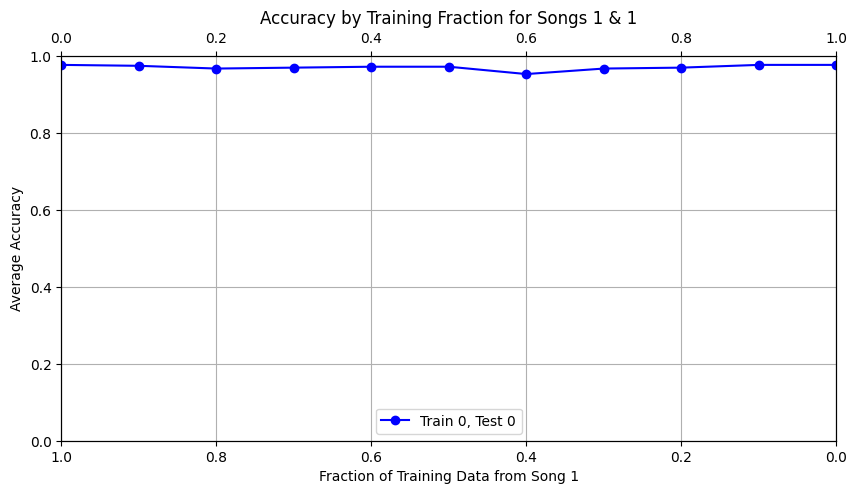

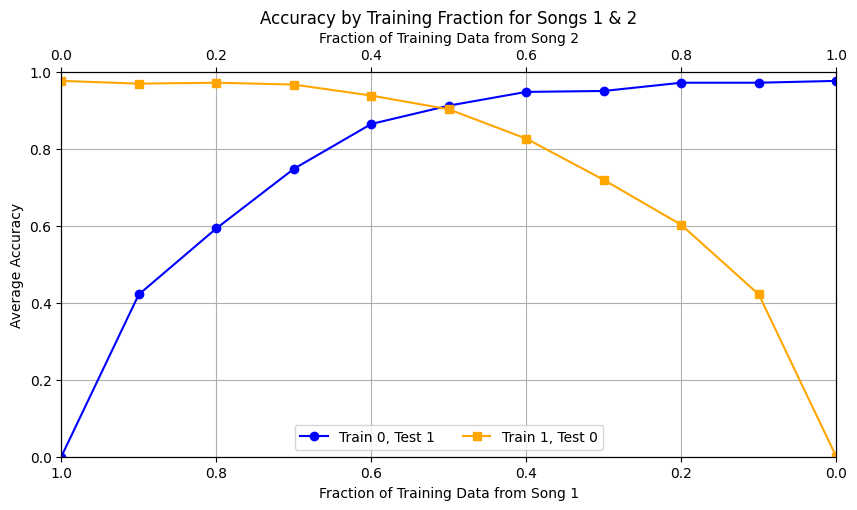

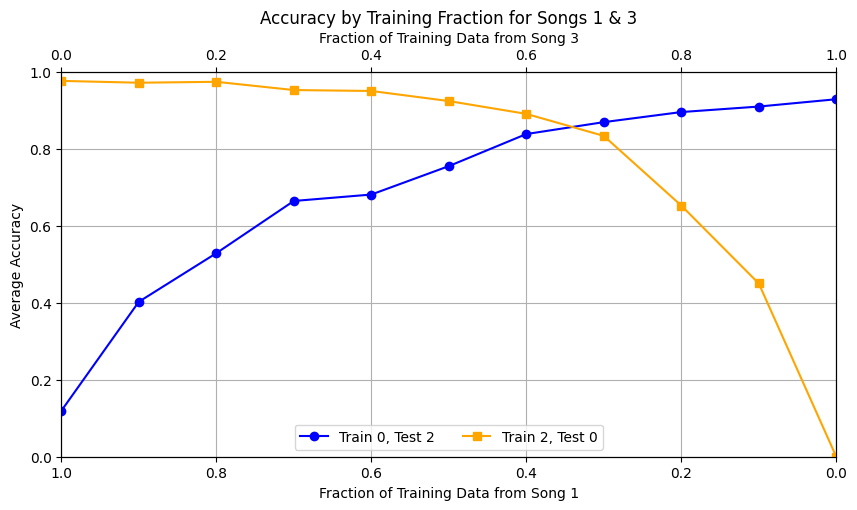

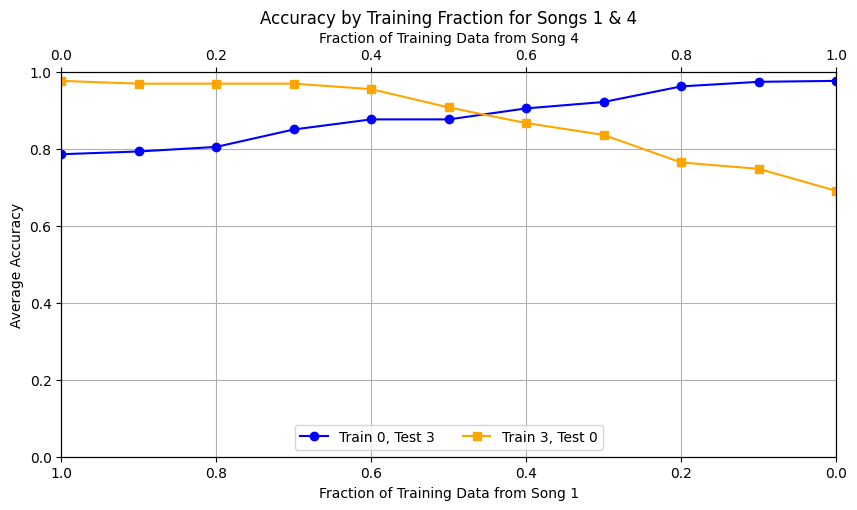

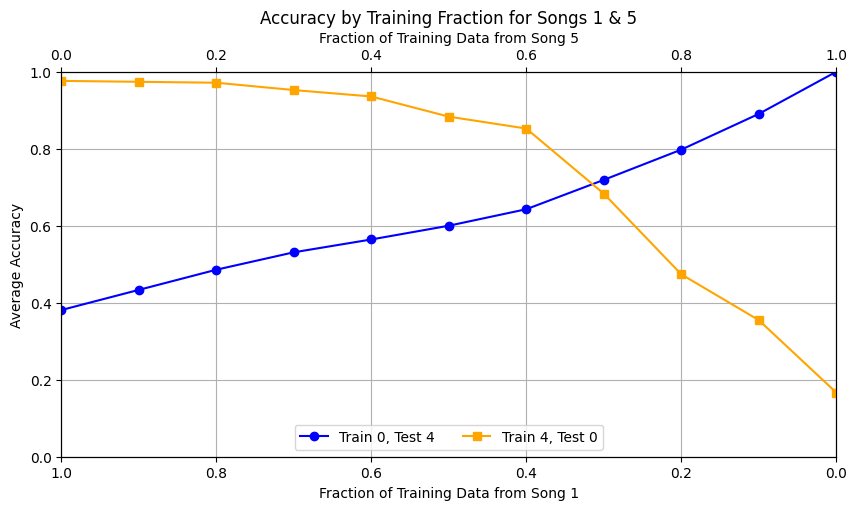

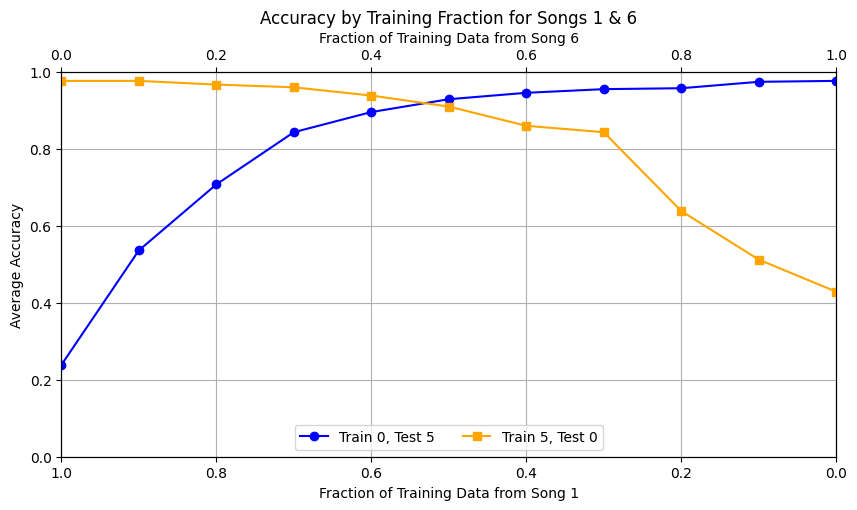

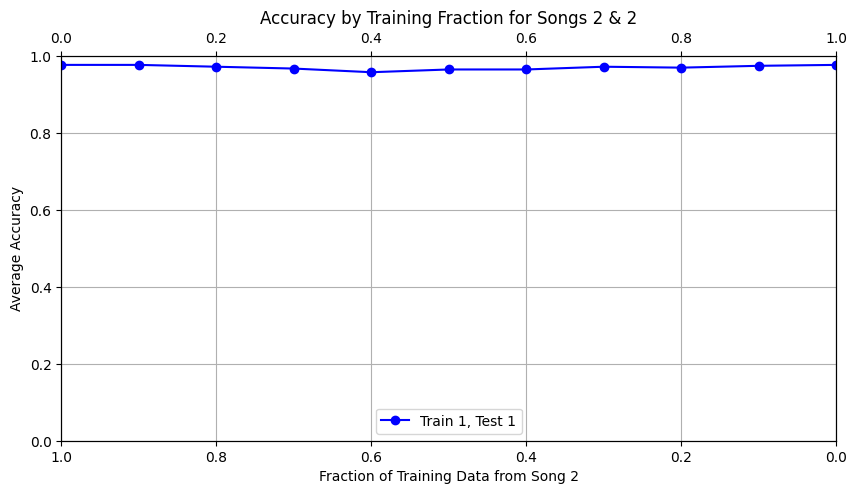

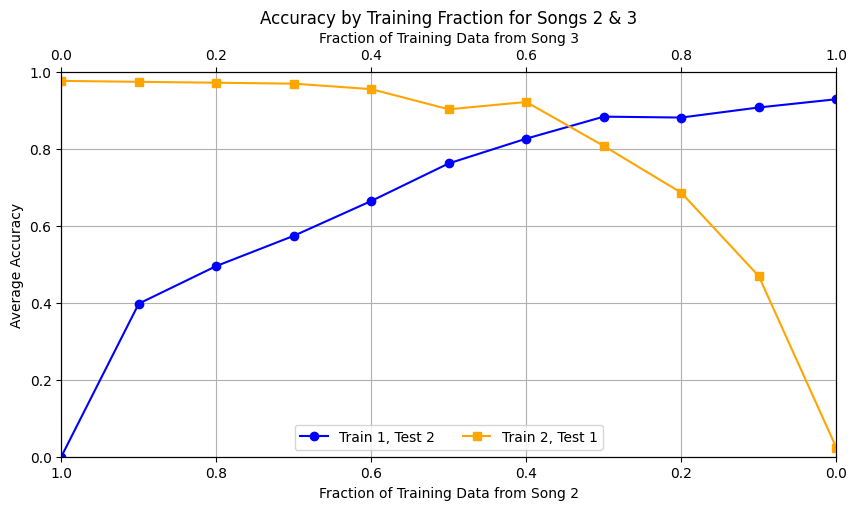

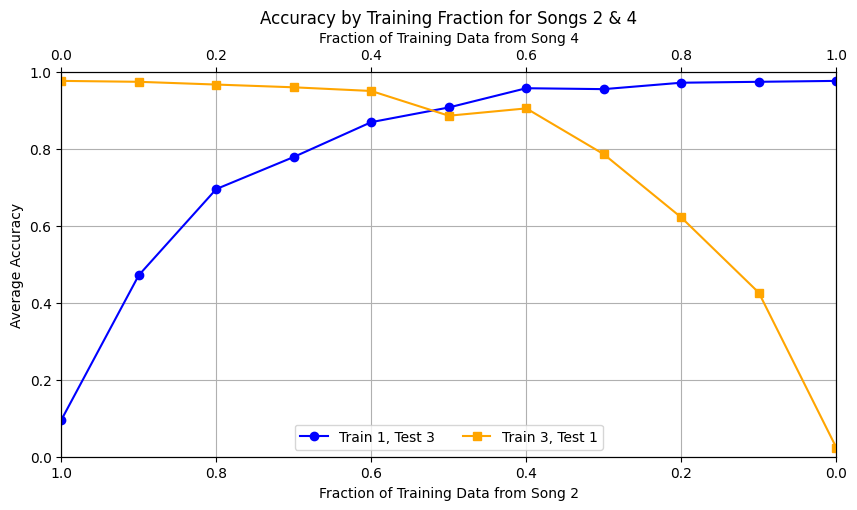

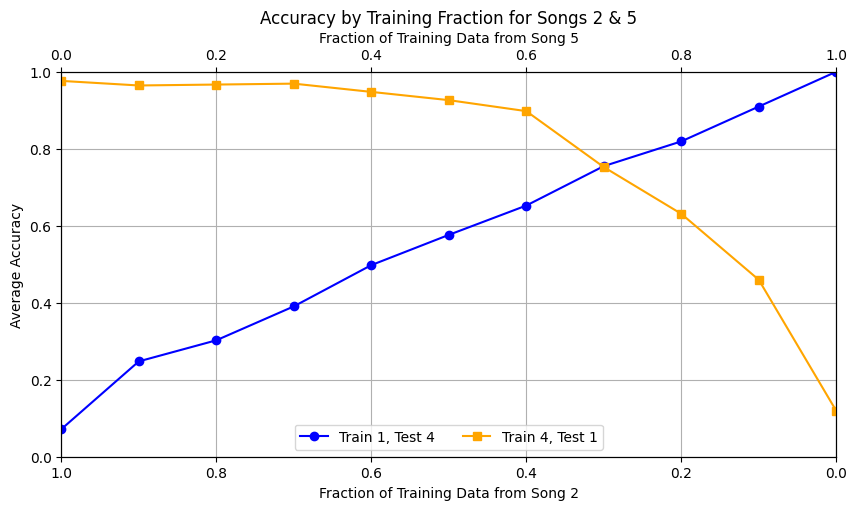

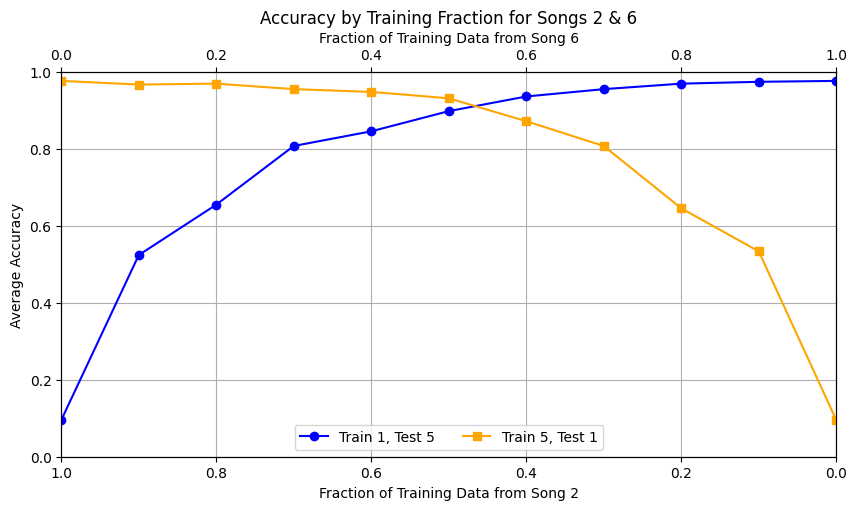

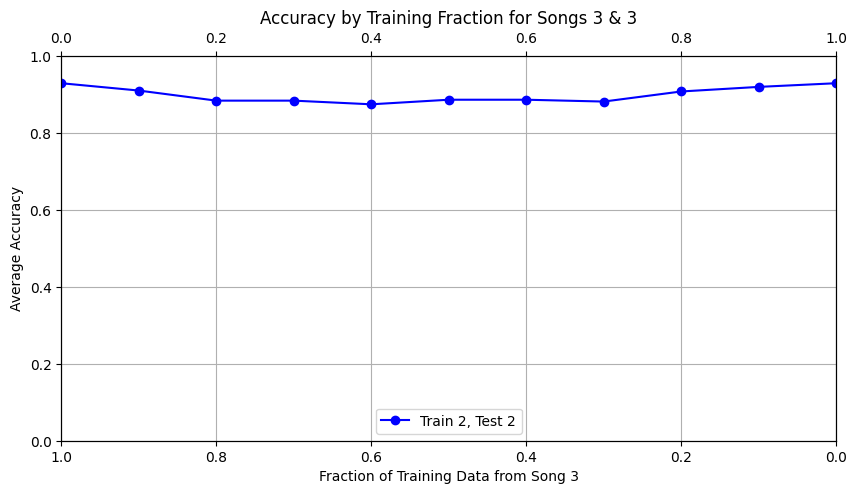

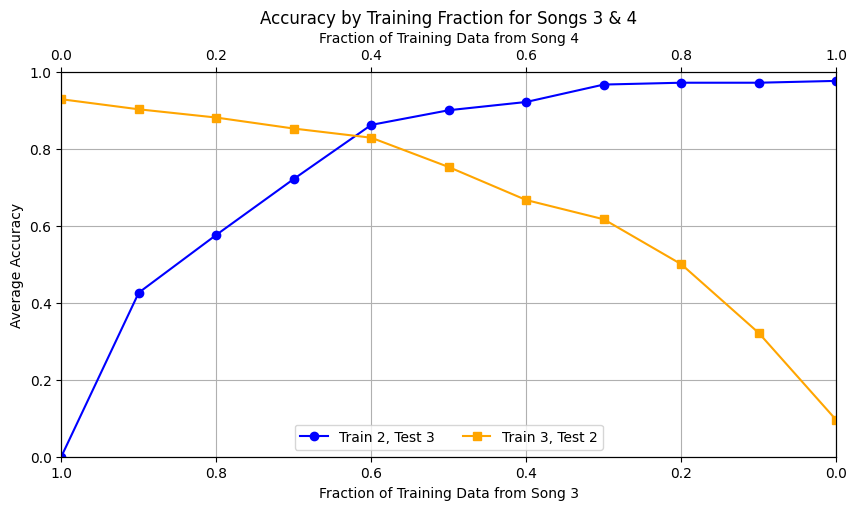

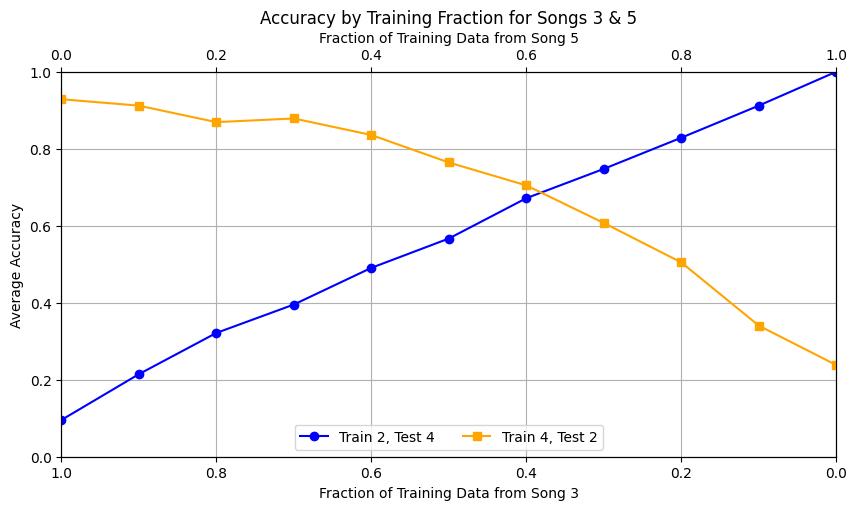

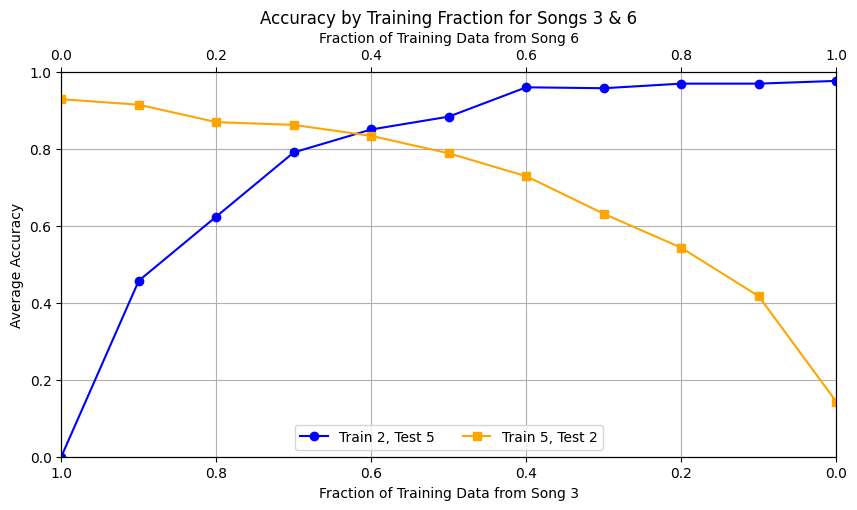

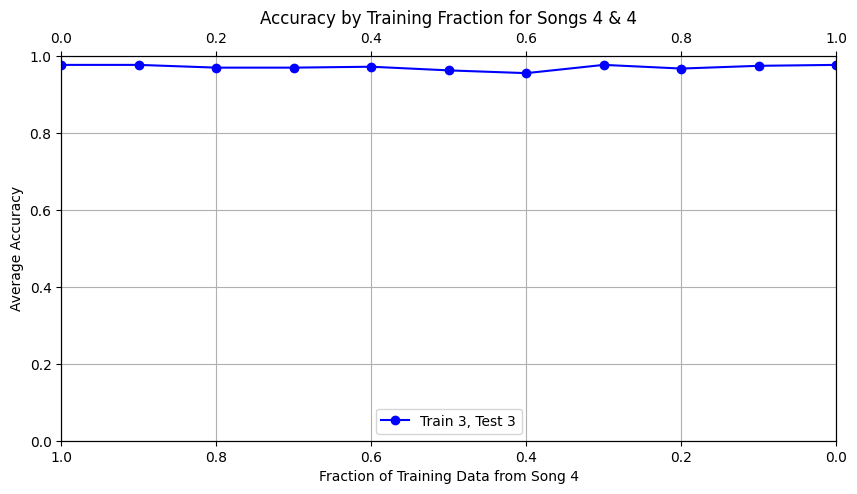

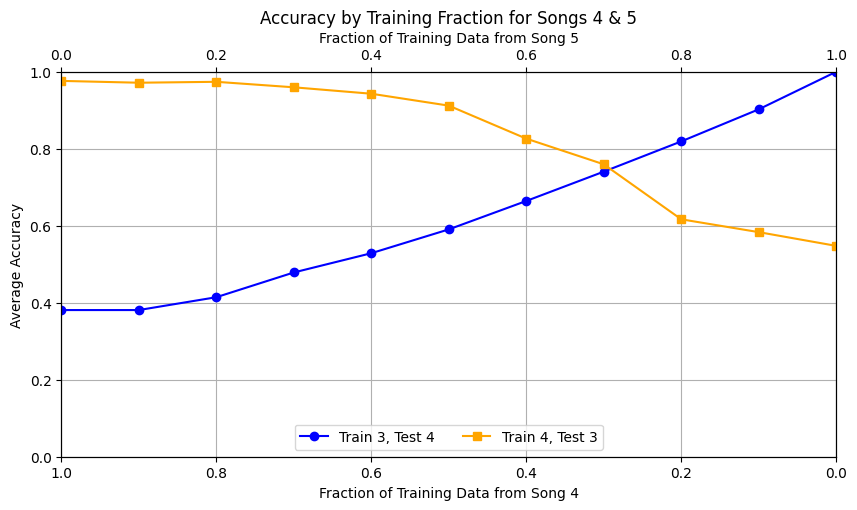

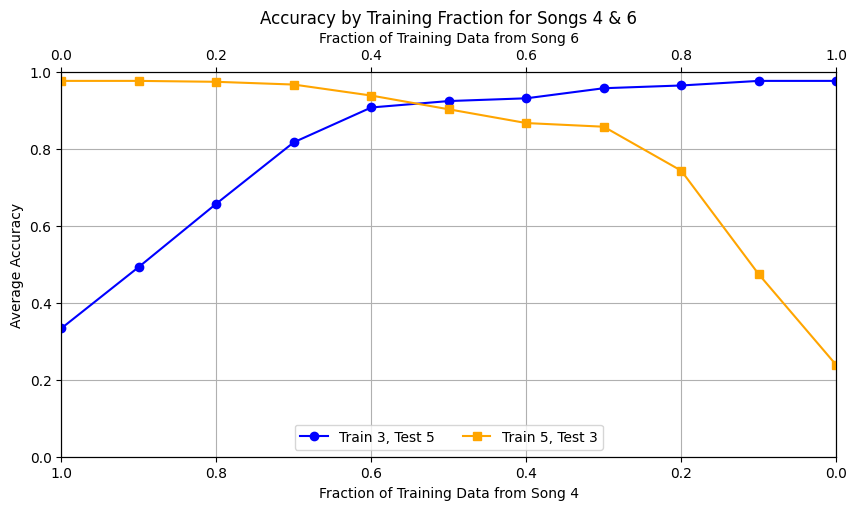

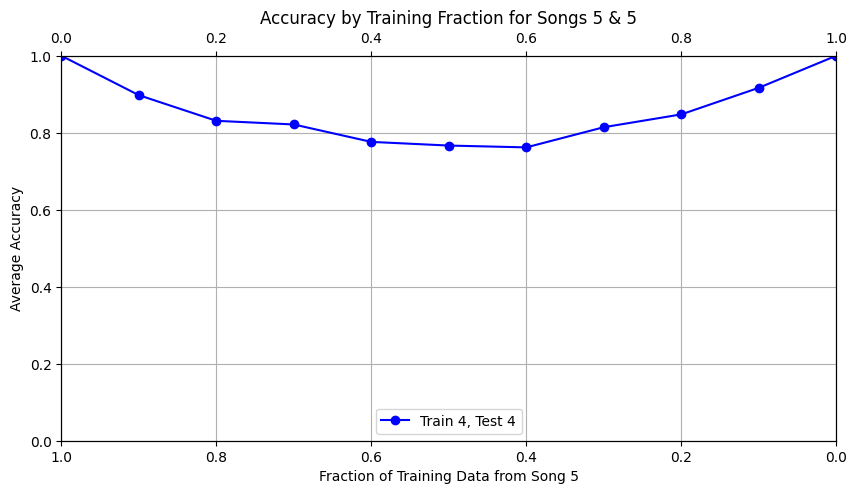

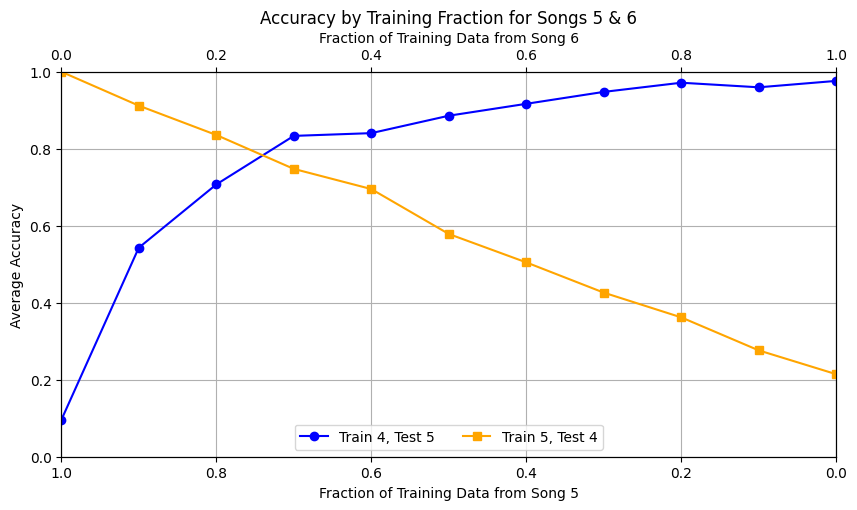

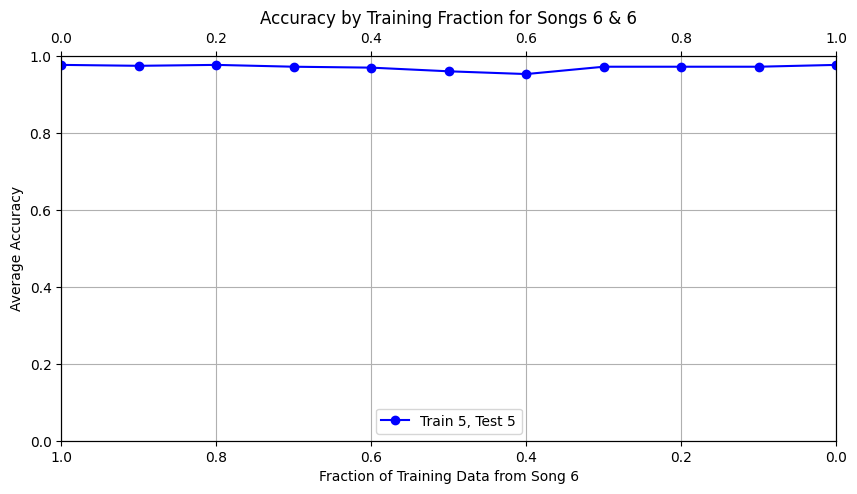

In [16]:
import matplotlib.pyplot as plt

# Organizing data for plotting by unordered pairs
plot_data = {}
for (train_idx, test_idx, fraction), accuracy in results.items():
    pair_label = tuple(sorted([train_idx, test_idx]))  # Create an unordered pair
    if pair_label not in plot_data:
        plot_data[pair_label] = {}
    order_label = f"Train {train_idx}, Test {test_idx}"
    if order_label not in plot_data[pair_label]:
        plot_data[pair_label][order_label] = ([], [])
    plot_data[pair_label][order_label][0].append(fraction)
    plot_data[pair_label][order_label][1].append(accuracy)

# Plotting data for each unordered pair
for pair, data in plot_data.items():
    fig, ax1 = plt.subplots(figsize=(10, 5))
    
    # Initialize the secondary axis regardless
    ax2 = ax1.twiny()

    # Set the y-axis limit to [0, 1] for all plots
    ax1.set_ylim([0, 1])

    # Sort data by fraction and plot for each training order within the pair
    for order_label, (fractions, accuracies) in data.items():
        sorted_data = sorted(zip(fractions, accuracies))  # Sort data by fraction
        fractions, accuracies = zip(*sorted_data)

        # Check the training index to determine which axis to plot on and set colors
        if "Train " + str(pair[0]) in order_label:
            # Plot for the first song in the pair on ax1
            ax1.plot(fractions, accuracies, 'o-', color='blue', label=order_label)
            ax1.set_xlabel(f'Fraction of Training Data from Song {pair[0]+1}')
            ax1.set_ylabel('Average Accuracy')
            ax1.set_xlim([1, 0])  # Inverts the x-axis for the first song
        else:
            # Plot for the second song in the pair on ax2
            ax2.plot(fractions, accuracies, 's-', color='orange', label=order_label)
            ax2.set_xlabel(f'Fraction of Training Data from Song {pair[1]+1}')
            ax2.set_xlim([0, 1])  # Regular order for the second song

    ax1.set_title(f'Accuracy by Training Fraction for Songs {pair[0]+1} & {pair[1]+1}')
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='lower center', ncol=2)
    #ax1.legend(lines , labels , loc='lower center', ncol=2)

    ax1.grid(True)
    plt.show()
